In [40]:
import matplotlib.pyplot as plt
import numpy as np

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (10.0, 7.0)

In [41]:
import numpy as np
import matplotlib.pyplot as plt


import time
from scipy.integrate import odeint
from scipy.special import zeta
from random import choices

In [42]:
"""Our system of differential equations belongs to the complex space, that is why we implemented the code suggested in"""
"""https://stackoverflow.com/questions/19910189/scipy-odeint-with-complex-initial-values."""

import time
import numpy as np
from scipy.integrate import odeint
from scipy.special import zeta
from random import choices

def odeintz(func, z0, t, **kwargs):
   
    
    """An odeint-like function for complex valued differential equations.

    Inputs:
    ----------
      -func: function associated to dr/dt=f(x;t), where x is the set of parameters and variables to be determined
      -z0: 1d array with length N*(5N-1)/2
      -t: 1d array from t=0 to t=tf (parameter set by the user)
      - **kwargs: keyword arguments related with external functions to be used in odeint
    
    Return:
      -z: multivariable array with the solution of the differential equation associated with each variable"""

    # Disallow Jacobian-related arguments.
    _unsupported_odeint_args = ['Dfun', 'col_deriv', 'ml', 'mu']
    bad_args = [arg for arg in kwargs if arg in _unsupported_odeint_args]
    if len(bad_args) > 0:
        raise ValueError("The odeint argument %r is not supported by "
                         "odeintz." % (bad_args[0],))

    # Make sure z0 is a numpy array of type np.complex128.
    z0 = np.array(z0, dtype=np.complex128, ndmin=1)

    def realfunc(x, t, *args):
        z = x.view(np.complex128)
        dzdt = func(z, t, *args)
        # func might return a python list, so convert its return
        # value to an array with type np.complex128, and then return
        # a np.float64 view of that array.
        return np.asarray(dzdt, dtype=np.complex128).view(np.float64)

    result = odeint(realfunc, z0.view(np.float64), t, **kwargs)

    if kwargs.get('full_output', False):
        z = result[0].view(np.complex128)
        infodict = result[1]
        return z, infodict
    else:
        z = result.view(np.complex128)
        return z

In [80]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import random, zeros

from numba import jit

dt = 0.05 # Time step.
T = 10 # Total time.
n = int(T / dt) # Number of time steps.

times = np.linspace(0., T, n)

J=1
N=20
    
refgamma=0.0 #Gamma phi
refdecay=0.0   #Gamma (solely)
refomega=2
    
Gamma_du=0  #Fixed
Gamma_phi=refgamma*J
Gamma_decay=refdecay*J
Omega=refomega*J
sqrt_2phi=  (2*Gamma_phi)**0.5
sqrt_decay= (Gamma_decay)**0.5
Stochastic=1   #Is the process stochastic?
sqrt_Gamma_phi = np.sqrt(Gamma_phi)

gama_sq= (  ((2*Gamma_phi)**0.5+ (Gamma_decay)**0.5  )**2 )/2





@jit

def trayectorystra(N=N,Stochastic=Stochastic):
    sqrtdt = np.sqrt(dt)*Stochastic
    
    Results = zeros((3*N, n))
    Rbar    = zeros((3*N, n))
    RandomNumbers= zeros((N, n))
    

    for j in range(N):
        a=(choices([-1,1]))[0]
        b=(choices([-1,1]))[0]
        Results[j][0]=a  #state |+>
        Results[j+N][0]=b
        Results[j+2*N][0]=-1


    for t in range(n-1):
        
        for i1 in range(N):
            RandomNumbers[i1][t]=random.randn()
            Normal_VA=RandomNumbers[i1][t]
            
            
            Rbar[i1][t]     = Results[i1][t]    +dt*(-Gamma_phi-(Gamma_decay/2)+gama_sq )*Results[i1][t]-\
                (sqrt_2phi+sqrt_decay ) *Results[i1+N][t]* sqrtdt * Normal_VA
            Rbar[i1+N][t]   = Results[i1+N][t]  +dt*(-Omega*Results[i1+2*N][t] +(-Gamma_phi- (Gamma_decay/2)+gama_sq)*Results[i1+N][t])+\
                (sqrt_2phi+sqrt_decay ) *Results[i1][t]* sqrtdt * Normal_VA
            Rbar[i1+2*N][t] = Results[i1+2*N][t]+dt*( Omega*Results[i1+N][t] - 1.5*Gamma_decay*(Results[i1+2*N][t]+1) )+\
                sqrt_decay*(Results[i1+2*N][t]+1)*sqrtdt * Normal_VA
            
            for j1 in range(N):
                if i1!=j1:
                    
                    Rbar[i1][t]  +=-2*Results[i1+N][t]*(J/N)*Results[j1+2*N][t]*dt
                    Rbar[i1+N][t]+= 2*Results[i1][t]*(J/N)*Results[j1+2*N][t]*dt
            
#-------------------------------------------------------------------------------------------------------            
        
        for i in range(N): 
            
            Normal_VA=RandomNumbers[i][t]
                        
            fxn   = (-Gamma_phi-(Gamma_decay/2)+gama_sq )*Results[i][t]
            Gxn   = -(sqrt_2phi+sqrt_decay )     *Results[i+N][t]
            fxbarn= (-Gamma_phi-(Gamma_decay/2)+gama_sq )*Rbar[i][t]
            Gxbarn= -(sqrt_2phi+sqrt_decay )     *Rbar[i+N][t]     
            
            fyn   = (-Omega*Results[i+2*N][t] -(Gamma_phi+ (Gamma_decay/2)-gama_sq)*Results[i+N][t])
            Gyn   = (sqrt_2phi+sqrt_decay ) *Results[i][t]
            fybarn= (-Omega*Rbar[i+2*N][t] -(Gamma_phi+ (Gamma_decay/2)-gama_sq)*Rbar[i+N][t])
            Gybarn= (sqrt_2phi+sqrt_decay ) *Rbar[i][t]
            
            fzn   = ( Omega*Results[i+N][t] - 1.5*Gamma_decay*(Results[i+2*N][t]+1) )
            Gzn   = sqrt_decay*(Results[i+2*N][t]+1)
            fzbarn= ( Omega*Rbar[i+N][t] - 1.5*Gamma_decay*(Rbar[i+2*N][t]+1) )
            Gzbarn= sqrt_decay*(Rbar[i+2*N][t]+1)

#-------------------------------------------------------------------------------------------------------            
        
            Results[i][t+1]       = Results[i][t]    +dt*0.5*(fxn+fxbarn)+0.5*(Gxn + Gxbarn)* sqrtdt * Normal_VA
            Results[i+N][t+1]     = Results[i+N][t]  +dt*0.5*(fyn+fybarn)+0.5*(Gyn + Gybarn)* sqrtdt * Normal_VA
            Results[i+2*N][t+1]   = Results[i+2*N][t]+dt*0.5*(fzn+fzbarn)+0.5*(Gzn + Gzbarn)* sqrtdt * Normal_VA
            
            for j in range(N):
                if i!=j:
                    Results[i][t+1]  +=  -(J/N)*(Results[i+N][t]*Results[j+2*N][t] + Rbar[i+N][t]*Rbar[j+2*N][t])*dt
                    Results[i+N][t+1]+=   (J/N)*(Results[i][t]*Results[j+2*N][t]   + Rbar[i][t]*Rbar[j+2*N][t])*dt
                    
    return Results, Rbar


In [81]:
from numpy import mean
from numpy import linalg

from numba import jit


@jit



def summary_stat(Res,N=N,n=n):
    Results =zeros((9, n))
    count=0
    while count<n:
        a,b,c=Res[0:N, count:count+1],Res[N:2*N, count:count+1],Res[2*N:3*N, count:count+1]
        
        Results[0][count],Results[1][count],Results[2][count]=N*mean(a)/2,N*mean(b)/2,N*mean(c)/2
        Results[3][count]=0.25*(  (N*mean(a))**2- (linalg.norm(a,2))**2 )
        Results[4][count]=0.25*(  (N*mean(b))**2- (linalg.norm(b,2))**2 )
        Results[5][count]=0.25*(  (N*mean(c))**2- (linalg.norm(c,2))**2 )
        Results[6][count]=(N*mean(a)/2)**2
        Results[7][count]=(N*mean(b)/2)**2
        Results[8][count]=(N*mean(c)/2)**2
        
        
        count=count+1
        
    
    return Results
    
    

In [82]:
Ni=3

a=[1,2,4]

(Ni*mean(a))**2- (linalg.norm(a,2))**2

28.0

In [83]:
#%timeit summary_stat(trayectory(N=N,Stochastic=Stochastic),N=N,n=n)

In [84]:
from numpy import add
from numba import jit



itera=5000
@jit

def averages(itera=itera,N=N,n=n,Stochastic=Stochastic):
    Results =zeros((9, n))
    for j in range(itera):
        Trayec=trayectorystra(N,Stochastic)[0]
        Results=add(Results,summary_stat(Trayec,N,n))
    
    return Results/itera
    
    
    
    

In [85]:
t0=time.time()

itera=10000

Result_varDDTWA=averages(itera=itera,N=N,n=n,Stochastic=1)
#Result_varDTWA=averages(itera=itera,N=N,n=n,Stochastic=0)

t1=time.time()

print(t1-t0)



<ipython-input-84-d2816b168b1c>:7: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "averages" failed type inference due to: Invalid use of type(CPUDispatcher(<function trayectorystra at 0x000001C29DD0B160>)) with parameters (int64, int64)

During: resolving callee type: type(CPUDispatcher(<function trayectorystra at 0x000001C29DD0B160>))
During: typing of call at <ipython-input-84-d2816b168b1c> (12)


File "<ipython-input-84-d2816b168b1c>", line 12:
def averages(itera=itera,N=N,n=n,Stochastic=Stochastic):
    <source elided>
    for j in range(itera):
        Trayec=trayectorystra(N,Stochastic)[0]
        ^

  @jit
<ipython-input-84-d2816b168b1c>:7: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "averages" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-84-d2816b168b1c>", line 11:
def averages(itera=ite

22.11390256881714


In [86]:
gammaplus=Gamma_du/2
gammaminus=Gamma_decay/2
gammaz=Gamma_phi/4


Gamma_ud=2*gammaplus
Gamma_du=2*gammaminus
Gamma_el=8*gammaz


In [87]:
Gamma_ud=2*gammaplus
Gamma_du=2*gammaminus
Gamma_el=8*gammaz

Gamma_r=Gamma_ud+Gamma_du+1e-8


gamma=(Gamma_ud-Gamma_du)/4

Tot=Gamma_r+Gamma_el

lamda=Gamma_r/2

J01=J


s=2*1j*gamma+2*J01/N
r=0#Gamma_ud*Gamma_du

spp=2*1j*gamma+2*2*J01/N
spm=2*1j*gamma

def p0_gen(t):
    return  0.5*np.exp(-Tot*t/2)*( np.exp(-lamda*t)*( np.cos(t*(s**2-r)**0.5) +  lamda*np.sin(t*(s**2-r)**0.5)/((s**2-r)**0.5+1e-8)) )**(N-1)

def pp_gen(t):
    return  0.25*np.exp(-Tot*t)*( np.exp(-lamda*t)*( np.cos(t*(spp**2-r)**0.5) +  lamda*np.sin(t*(spp**2-r)**0.5)/((spp**2-r)**0.5+1e-8)) )**(N-2)

def pm_gen(t):
    return  0.25*np.exp(-Tot*t)*( np.exp(-lamda*t)*( np.cos(t*(spm**2-r)**0.5) +  lamda*np.sin(t*(spm**2-r)**0.5)/((spm**2-r+1e-8)**0.5)) )**(N-2)


def z0_gen(t):
    return 2*(Gamma_ud-Gamma_du)/(Gamma_ud+Gamma_du+1e-8)*np.exp(-Gamma_r*t/2)*np.sinh(Gamma_r*t/2) 

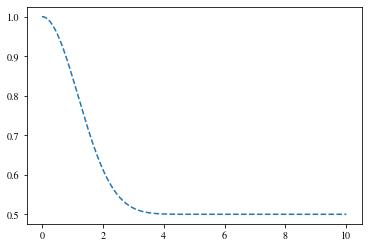

In [88]:
sixsjx=2*(np.real( pp_gen(times) )  + np.real( pm_gen(times) ) )



plt.plot(times,sixsjx,"--")

In [89]:
siysjy=2*(-np.real( pp_gen(times) )  + np.real( pm_gen(times) ) )

varY=(N/4)+(N*(N-1)/2)*(-np.real(pp_gen(times)) + np.real(pm_gen(times)))-(N**2)*(np.real(p0_gen(times)))**2


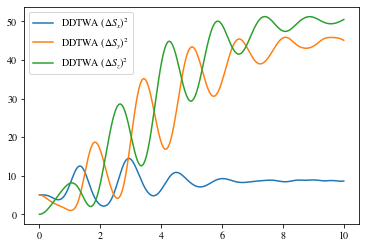

In [90]:
ax=N/4+  np.array(Result_varDDTWA[3+0])-np.array((Result_varDDTWA[0])**2)
ay=N/4+  np.array(Result_varDDTWA[3+1])-np.array((Result_varDDTWA[1])**2)
az=N/4+  np.array(Result_varDDTWA[3+2])-np.array((Result_varDDTWA[2])**2)




plt.plot(times,ax,label="DDTWA $(\Delta S_x)^2$")
plt.plot(times,ay,label="DDTWA $(\Delta S_y)^2$")
plt.plot(times,az,label="DDTWA $(\Delta S_z)^2$")


plt.legend()

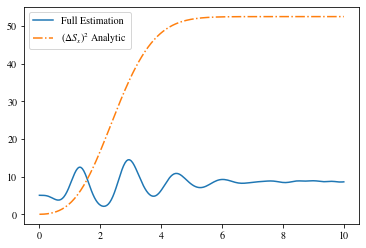

In [91]:
varX=(N/4)+(N*(N-1)/2)*( np.real(pp_gen(times)) + np.real(pm_gen(times)))-(N**2)*(np.real(p0_gen(times)))**2

ax=N/4+  Result_varDDTWA[3+0]-(Result_varDDTWA[0])**2


plt.plot(times,ax,label="Full Estimation")

plt.plot(times,varX,"-.",label="$(\Delta S_x)^2$ Analytic")

plt.legend()

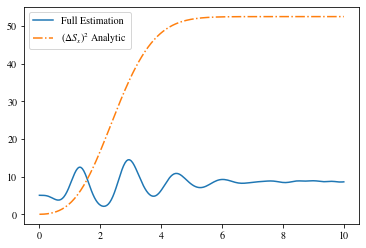

In [92]:



plt.plot(times,ax,label="Full Estimation")

plt.plot(times,varX,"-.",label="$(\Delta S_x)^2$ Analytic")

plt.legend()

C:\Users\camil\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\camil\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


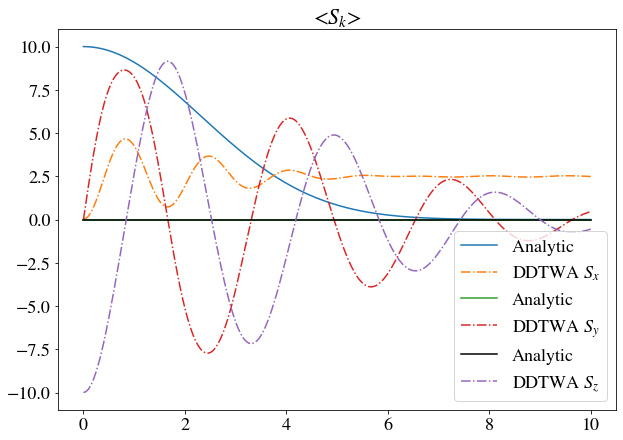

In [93]:
#### ONLY WORKS FOR |+>


matplotlib.rcParams['figure.figsize'] = (10.0, 7.0)
matplotlib.rcParams['font.size'] = 18



plt.title("<$S_k$>")

#Leave uncommented the analytical solutions if you are using |+>


plt.plot(times,(N/2)*(p0_gen(times) + np.conjugate(p0_gen(times)) ),label="Analytic ")
plt.plot(times,(Result_varDDTWA[0]),"-.",label="DDTWA $S_x$")


plt.plot(times,-(N/2)*1j*(-p0_gen(times) + np.conjugate(p0_gen(times)) ),label="Analytic")
plt.plot(times,(Result_varDDTWA[1]),"-.",label="DDTWA $S_y$")


plt.plot(times,(N/2)*z0_gen(times),label="Analytic",c="k")
plt.plot(times,(Result_varDDTWA[2]),"-.",label="DDTWA $S_z$")

plt.legend()

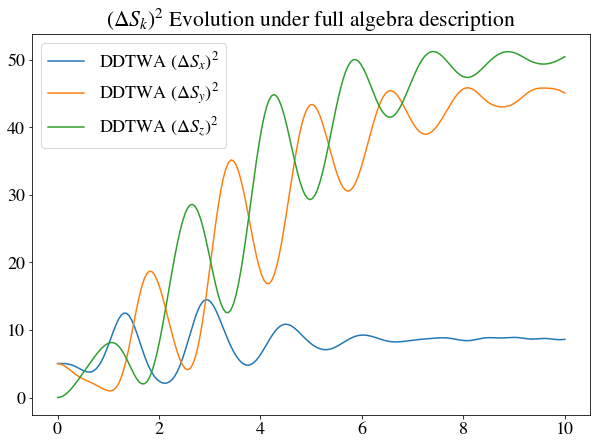

In [94]:
plt.title("$(\Delta S_k)^2$ Evolution under full algebra description")



matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)
ax=N/4+  Result_varDDTWA[3+0]-(Result_varDDTWA[0])**2
ay=N/4+  Result_varDDTWA[3+1]-(Result_varDDTWA[1])**2
az=N/4+  Result_varDDTWA[3+2]-(Result_varDDTWA[2])**2




plt.plot(times,ax,label="DDTWA $(\Delta S_x)^2$")
plt.plot(times,ay,label="DDTWA $(\Delta S_y)^2$")
plt.plot(times,az,label="DDTWA $(\Delta S_z)^2$")


plt.legend()

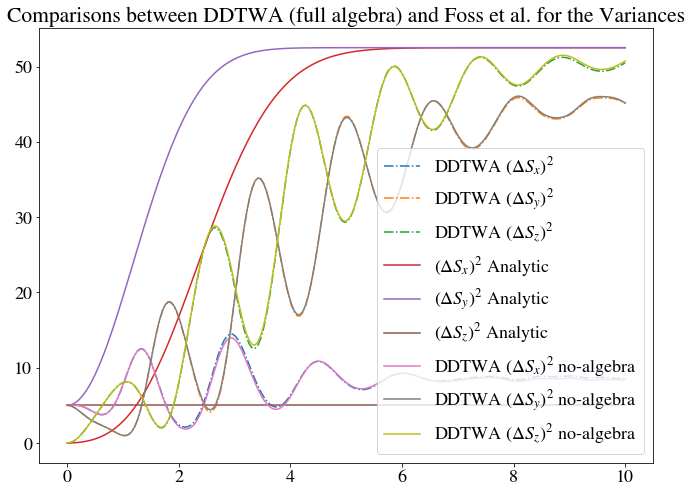

In [95]:
plt.title("Comparisons between DDTWA (full algebra) and Foss et al. for the Variances")

plt.plot(times,ax,"-.",label="DDTWA $(\Delta S_x)^2$")
plt.plot(times,ay,"-.",label="DDTWA $(\Delta S_y)^2$")
plt.plot(times,az,"-.",label="DDTWA $(\Delta S_z)^2$")

#Leave uncommented the analytical solutions if you are using |+>

varX=(N/4)+(N*(N-1)/2)*( np.real(pp_gen(times)) + np.real(pm_gen(times)))-(N**2)*(np.real(p0_gen(times)))**2
varY=(N/4)+(N*(N-1)/2)*( -np.real(pp_gen(times)) + np.real(pm_gen(times)))-(N**2)*(np.imag(p0_gen(times)))**2
varZ=(N/4)*(1-(z0_gen(times))**2)



plt.plot(times,varX,label="$(\Delta S_x)^2$ Analytic")
plt.plot(times,varY,label="$(\Delta S_y)^2$ Analytic")
plt.plot(times,varZ,label="$(\Delta S_z)^2$ Analytic")


ax1=np.array(Result_varDDTWA[6+0])-np.array((Result_varDDTWA[0])**2)
ay1=np.array(Result_varDDTWA[6+1])-np.array((Result_varDDTWA[1])**2)
az1=np.array(Result_varDDTWA[6+2])-np.array((Result_varDDTWA[2])**2)


plt.plot(times,ax1,label="DDTWA $(\Delta S_x)^2 $ no-algebra")
plt.plot(times,ay1,label="DDTWA $(\Delta S_y)^2 $ no-algebra")
plt.plot(times,az1,label="DDTWA $(\Delta S_z)^2 $ no-algebra")


plt.legend()

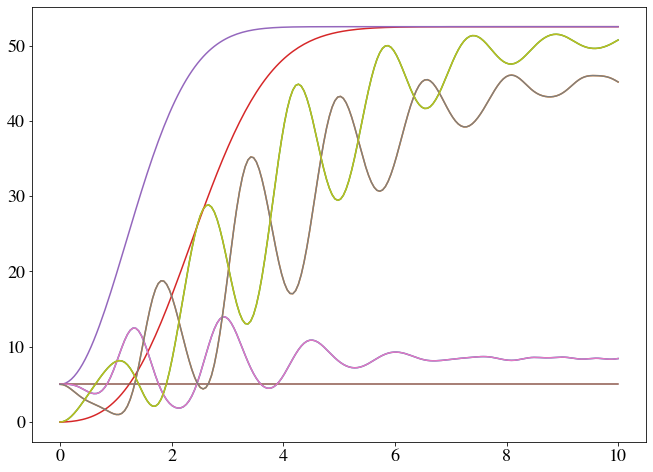

In [96]:
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)
ax1=Result_varDDTWA[6+0]-(Result_varDDTWA[0])**2
ay1=Result_varDDTWA[6+1]-(Result_varDDTWA[1])**2
az1=Result_varDDTWA[6+2]-(Result_varDDTWA[2])**2


plt.plot(times,ax1,label="DDTWA $(\Delta S_x)^2 no-algebra$")
plt.plot(times,ay1,label="DDTWA $(\Delta S_y)^2 no-algebra$")
plt.plot(times,az1,label="DDTWA $(\Delta S_z)^2 no-algebra$")


plt.plot(times,varX,label="$(\Delta S_x)^2$ Analytic")
plt.plot(times,varY,label="$(\Delta S_y)^2$ Analytic")
plt.plot(times,varZ,label="$(\Delta S_z)^2$ Analytic")


plt.plot(times,ax1,label="DDTWA $(\Delta S_x)^2$")
plt.plot(times,ay1,label="DDTWA $(\Delta S_y)^2$")
plt.plot(times,az1,label="DDTWA $(\Delta S_z)^2$")

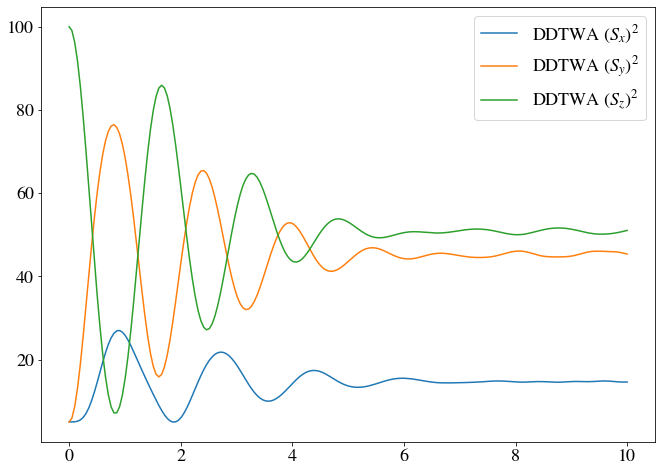

In [97]:
ax2=Result_varDDTWA[6+0]
ay2=Result_varDDTWA[6+1]
az2=Result_varDDTWA[6+2]


plt.plot(times,ax2,label="DDTWA $( S_x)^2$")
plt.plot(times,ay2,label="DDTWA $( S_y)^2$")
plt.plot(times,az2,label="DDTWA $( S_z)^2$")

plt.legend()

In [61]:
import qutip
from qutip.piqs import *

import numpy as np
from qutip import sigmax, sigmay, sigmaz,tensor, qeye, Qobj
from qutip import basis
from qutip import sesolve

import matplotlib.pyplot as plt

#times1=times 
times1=times

n=N

def arraygen(n,A):
    Arr=[]
    for j in range(n):
        Arr.append(A)
    return Arr


def S_k(k,n=n):
    
    h=0*qeye(2**n)
    if k==0:
            
        for i in range(n):
            Arr=arraygen(n,qeye(2))
            Arr[i]=sigmax()
            h=np.add(h,tensor(Arr))
    if k==1:
        for i in range(n):
            Arr=arraygen(n,qeye(2))
            Arr[i]=sigmay()
            h=np.add(h,tensor(Arr))
    if k==2:
        for i in range(n):
            Arr=arraygen(n,qeye(2))
            Arr[i]=sigmaz()
            h=np.add(h,tensor(Arr))
        
    
    return h/2
    

    
def matrix_dec(k,index,rate):
    h=0*qeye(2**N)
    sminus=(sigmax()-1j*sigmay())/2

    if k=="z":
        
        Arr=arraygen(N,qeye(2))
        Arr[index]=sigmaz()
        
        return Qobj(np.sqrt(rate)*np.add(h,tensor(Arr)))
    
    elif k=="-":
            
        Arr=arraygen(N,qeye(2))
        Arr[index]=sminus
        
        return Qobj(np.sqrt(rate)*np.add(h,tensor(Arr)))
    
    
    
    
def unc_list(k,rate):
    unc_list=[]
    for j in range(N):
        unc_list.append(matrix_dec(k,j,rate))
    
    return unc_list 
    

## Initial state fro QuTiP

#psi_init=np.cos(np.pi/4)*(basis(2,0)+basis(2,1))
psi_init=basis(2,1)
psi0=Qobj(tensor(arraygen(n,psi_init)))    


H=Qobj( (2*(J/n)*S_k(2,n)*S_k(2,n)+Omega*S_k(0,n))  )




def result():
    return sesolve(H, psi0, times1, [Qobj(S_k(0,n)),Qobj(S_k(1,n)),Qobj(S_k(2,n)),Qobj(S_k(0,n))**2,Qobj(S_k(1,n))**2,Qobj(S_k(2,n))**2])

#Use for unitary dynamics solely

#result=result()

In [62]:
Omega

2

In [63]:
from qutip import mesolve

Collapsing_Operators= unc_list("z",Gamma_phi/2)+unc_list("-",Gamma_decay) #Uncorrelated decoherence

Xcuad=Qobj(S_k(0,N))**2
Ycuad=Qobj(S_k(1,N))**2
Zcuad=Qobj(S_k(2,N))**2

Expected_Operators= [Qobj(S_k(0,n)),Qobj(S_k(1,n)),Qobj(S_k(2,n)),Xcuad,Ycuad,Zcuad]


#Gamma_phi_C=Gamma_phi
#Gamma_C=Gamma_decay

#  Collapsing_Operators= [np.sqrt(Gamma_phi_C)*Qobj(S_k(2,N)),np.sqrt(Gamma_C)*Qobj(S_k("-",N))]  #Collective


result1 = mesolve(H, psi0, times, Collapsing_Operators, Expected_Operators)


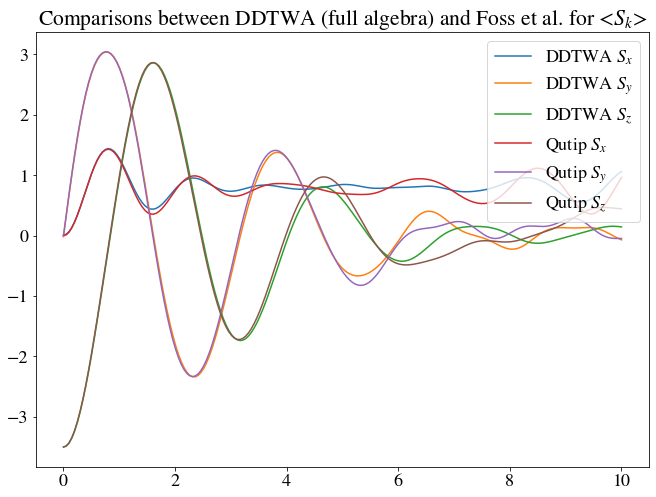

In [64]:
fig, ax = plt.subplots()

plt.title("Comparisons between DDTWA (full algebra) and Foss et al. for <$S_k$>")



plt.plot(times,(Result_varDDTWA[0]),label="DDTWA $S_x$")
plt.plot(times,(Result_varDDTWA[1]),label="DDTWA $S_y$")
plt.plot(times,(Result_varDDTWA[2]),label="DDTWA $S_z$")

ax.plot(times, result1.expect[0],label="Qutip $S_x$")
ax.plot(times, result1.expect[1],label="Qutip $S_y$")
ax.plot(times, result1.expect[2],label="Qutip $S_z$")

#plt.plot(times,(N/2)*(p0_gen(times) + np.conjugate(p0_gen(times)) ),"--",label="Analytic $S_x$")
#plt.plot(times,-(N/2)*1j*(-p0_gen(times) + np.conjugate(p0_gen(times)) ),"--",label="Analytic $S_y$")
#plt.plot(times,(N/2)*z0_gen(times),"--",label="Analytic $S_z$",c="k")

plt.legend(loc="upper right")


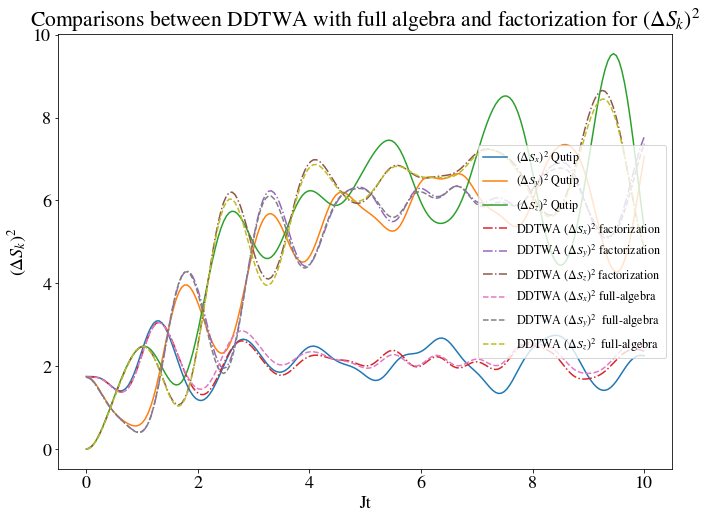

In [65]:
plt.title("Comparisons between DDTWA with full algebra and factorization for $(\Delta S_k)^2$")

matplotlib.rcParams['font.size'] = 12
varX=(N/4)+(N*(N-1)/2)*( np.real(pp_gen(times)) + np.real(pm_gen(times)))-(N**2)*(np.real(p0_gen(times)))**2
varY=(N/4)+(N*(N-1)/2)*( -np.real(pp_gen(times)) + np.real(pm_gen(times)))-(N**2)*(np.imag(p0_gen(times)))**2
varZ=(N/4)*(1-(z0_gen(times))**2)




#plt.plot(times,varX,label="$(\Delta S_x)^2$ Analytic")
#plt.plot(times,varY,label="$(\Delta S_y)^2$ Analytic")
#plt.plot(times,varZ,label="$(\Delta S_z)^2$ Analytic")



plt.plot(times, result1.expect[3]-(result1.expect[0])**2,label="$(\Delta S_x)^2$ Qutip")
plt.plot(times, result1.expect[4]-(result1.expect[1])**2,label="$(\Delta S_y)^2$ Qutip")
plt.plot(times, result1.expect[5]-(result1.expect[2])**2,label="$(\Delta S_z)^2$ Qutip")

ax=N/4+  Result_varDDTWA[3+0]-(Result_varDDTWA[0])**2
ay=N/4+  Result_varDDTWA[3+1]-(Result_varDDTWA[1])**2
az=N/4+  Result_varDDTWA[3+2]-(Result_varDDTWA[2])**2

plt.plot(times,ax1,"-.",label="DDTWA $(\Delta S_x)^2 $ factorization")
plt.plot(times,ay1,"-.",label="DDTWA $(\Delta S_y)^2 $ factorization")
plt.plot(times,az1,"-.",label="DDTWA $(\Delta S_z)^2 $ factorization")


plt.plot(times,ax,"--",label="DDTWA $(\Delta S_x)^2$ full-algebra")
plt.plot(times,ay,"--",label="DDTWA $(\Delta S_y)^2$  full-algebra")
plt.plot(times,az,"--",label="DDTWA $(\Delta S_z)^2$  full-algebra")

plt.xlabel("Jt")
plt.ylabel("$(\Delta S_k)^2$")

plt.legend(loc="center right")

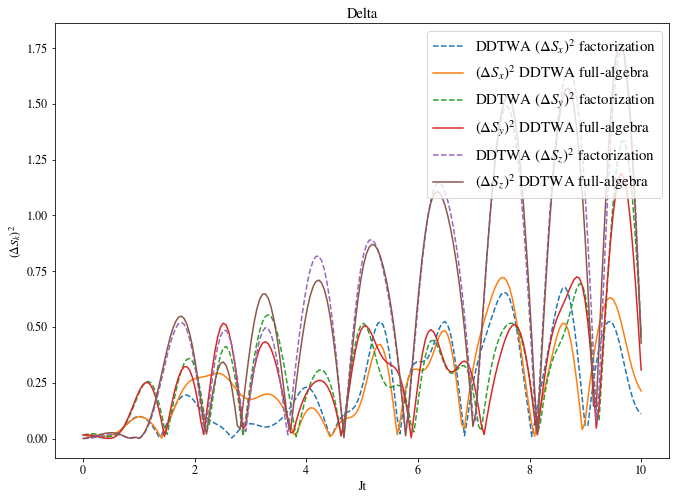

In [66]:
plt.title("Delta")

matplotlib.rcParams['font.size'] = 15
varX=(N/4)+(N*(N-1)/2)*( np.real(pp_gen(times)) + np.real(pm_gen(times)))-(N**2)*(np.real(p0_gen(times)))**2
varY=(N/4)+(N*(N-1)/2)*( -np.real(pp_gen(times)) + np.real(pm_gen(times)))-(N**2)*(np.imag(p0_gen(times)))**2
varZ=(N/4)*(1-(z0_gen(times))**2)

Qutx=np.array(result1.expect[3])-np.array((result1.expect[0])**2)
Quty=np.array(result1.expect[4])-np.array((result1.expect[1])**2)
Qutz=np.array(result1.expect[5])-np.array((result1.expect[2])**2)


ax=N/4+  np.array(Result_varDDTWA[3+0])-np.array((Result_varDDTWA[0])**2)
ay=N/4+  np.array(Result_varDDTWA[3+1])-np.array((Result_varDDTWA[1])**2)
az=N/4+  np.array(Result_varDDTWA[3+2])-np.array((Result_varDDTWA[2])**2)

plt.plot(times,np.abs(ax1-Qutx),"--",label="DDTWA $(\Delta S_x)^2 $ factorization")
plt.plot(times,np.abs(ax-Qutx),label="$(\Delta S_x)^2$ DDTWA full-algebra")

plt.plot(times,np.abs(ay1-Quty),"--",label="DDTWA $(\Delta S_y)^2 $ factorization")
plt.plot(times,np.abs(ay-Quty),label="$(\Delta S_y)^2$ DDTWA full-algebra")


plt.plot(times,np.abs(az1-Qutz),"--",label="DDTWA $(\Delta S_z)^2 $ factorization")
plt.plot(times,np.abs(az-Qutz),label="$(\Delta S_z)^2$ DDTWA full-algebra")

plt.xlabel("Jt")
plt.ylabel("$(\Delta S_k)^2$")

plt.legend(loc="upper right")

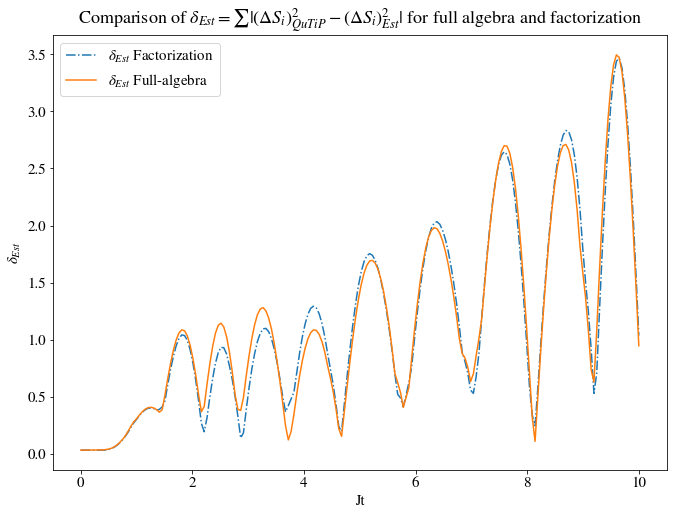

In [67]:
plt.title("Comparison of $\delta_{Est}=\sum  |(\Delta S_i)^2_{QuTiP}-(\Delta S_i)^2_{Est}|$ for full algebra and factorization")

plt.plot(times,np.abs(ax1-Qutx)+np.abs(ay1-Quty)+np.abs(az1-Qutz),"-.",label="$\delta_{Est}$ Factorization")
plt.plot(times,np.abs(ax-Qutx)+np.abs(ay-Quty)+np.abs(az-Qutz),label="$\delta_{Est}$ Full-algebra")


plt.xlabel("Jt")
plt.ylabel("$\delta_{Est}$")

plt.legend()

In [68]:
varX=(N/4)+(N*(N-1)/2)*( np.real(pp_gen(times)) + np.real(pm_gen(times)))-(N**2)*(np.real(p0_gen(times)))**2
varY=(N/4)+(N*(N-1)/2)*( -np.real(pp_gen(times)) + np.real(pm_gen(times)))-(N**2)*(np.imag(p0_gen(times)))**2
varZ=(N/4)*(1-(z0_gen(times))**2)


sixsjx=2*(np.real( pp_gen(times) )  + np.real( pm_gen(times) ) )

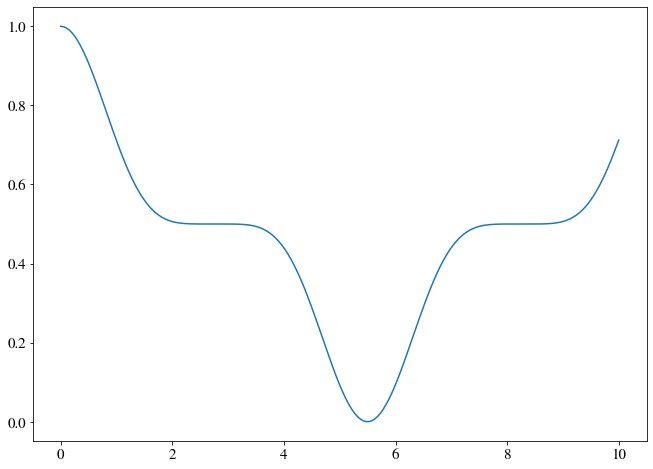

In [69]:
plt.plot(times,np.real(sixsjx))

In [98]:
# Here we define Aplus_j and Aminus_j 
    

def index_list(N=N):
    Index_list=[]
    for j in range(N+1):
        for k in range(N+1):
            Index_list.append([j,k])
    return Index_list
    

In [99]:
def Aplus_j(n):
    if 0<=n<=N:
        return np.sqrt( (N-n)*  (n+1) )
    else:
        return 0

    
def Aminus_j(n):
    if 0<=n<=N:
        return np.sqrt( (n)*  (N-n+1) )
    else:
        return 0    
    
    
def Az(n):
    return -N/2+n



Gamma_phi=refgamma*J















Gamma_C=refdecay*J

Omega=refomega*J

from numba import jit

#@jit



def vectorsR(r, t,J=J,N=N,Omega=Omega,Gamma_C=Gamma_C,Gamma_phi=Gamma_phi):#,Vect=Vect):   
            
    #matrix_zero=np.zeros((int(3*N),int(3*N)),dtype = 'complex_')
    matrix_zero=np.zeros((int( (N+1)**2  ),int((N+1)**2)),dtype = 'complex_')
    
    
    drdt =  np.matmul(matrix_zero, r)  #matrix_zero @ r   #sum of the linear and the constant part
    #drdt = matrix_zero @ r
    
    
    Index_list=index_list(N)
    
    
    ###Define Vect which is an array of coordinates of size N
    
    count=0
       
    
    for vect in Index_list:
        n1  =vect[0]
        npr1=vect[1]
        npr=npr1

            
        cfinnprm1=Index_list.count([n1,npr1-1])
        indnnprm1=Index_list.index(list(cfinnprm1*np.array([n1,npr1-1])))
            
        cfinm1npr=Index_list.count([n1-1,npr1])
        indnm1npr=Index_list.index(list(cfinm1npr*np.array([n1-1,npr1])))
            
        cfinnprp1=Index_list.count([n1,npr1+1])
        indnnprp1=Index_list.index(list(cfinnprp1*np.array([n1,npr1+1])))
            
        cfinp1npr=Index_list.count([n1+1,npr1])
        indnp1npr=Index_list.index(list(cfinp1npr*np.array([n1+1,npr1])))
            
        cfinp1nprp1=Index_list.count([n1+1,npr1+1])
        indnp1nprp1=Index_list.index(list(cfinp1nprp1*np.array([n1+1,npr1+1])))
            
        cfinnpr=Index_list.count([n1,npr1])
        indnnpr=Index_list.index(list(cfinnpr*np.array([n1,npr1])))
        
        
            
        drdt[indnnpr]+=1j*(Omega/2)* Aplus_j(npr1-1)*cfinnprm1*r[indnnprm1]+\
            -1j*(Omega/2)*Aplus_j(n1-1)*cfinm1npr*r[indnm1npr]+1j*(Omega/2)*Aminus_j(npr1+1)*cfinnprp1*r[indnnprp1]+\
            -1j*(Omega/2)*Aminus_j(n1+1)*cfinp1npr*r[indnp1npr]+Gamma_C*Aminus_j(n1+1)*Aminus_j(npr+1)*cfinp1nprp1*r[indnp1nprp1]+\
            2*1j*(J/N)*(Az(npr1)**2-Az(n1)**2)*cfinnpr*r[indnnpr]  -Gamma_phi*( (Az(n1)-Az(npr1))**2 )*cfinnpr*r[indnnpr]+\
            -(Gamma_C/2)*(Aminus_j(n1)*Aplus_j(n1-1) + Aminus_j(npr1)*Aplus_j(npr1-1) )*cfinnpr*r[indnnpr]

               
    return drdt


r0=int((N+1)**2)*[0]

r0[0]=1

rinit=r0


In [ ]:
t0=time.time()

z=odeintz(vectorsR, r0, times)#, args=(N,L))
t1=time.time()

In [ ]:
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)

for j in range((N+1)**2):
    plt.plot(times,np.real(z[:,j]))
    plt.plot(times,np.imag(z[:,j]))

print(t1-t0,N)

In [ ]:
#z[3,:]  We obtain the third elements of the density matrix

"We can determine the density matrix using the following function"

from numba import jit

#@jit

def rho_matr(time_index):
    rho_matr=np.zeros((int( (N+1)  ),int((N+1))),dtype = 'complex_')
    count=0
    for i in range(N+1):
        for j in range(N+1):
            rho_matr[i][j]= z[time_index,:][count]
            
            count=count+1
            
    return rho_matr

In [ ]:
def Sxyz_dicke(N=N):
    S_x=np.zeros((int( (N+1)  ),int((N+1))),dtype = 'complex_')
    S_y=np.zeros((int( (N+1)  ),int((N+1))),dtype = 'complex_')
    S_z=np.zeros((int( (N+1)  ),int((N+1))),dtype = 'complex_')

    for n in range(1,N+1):
        S_x[n][n-1]= 0.5*Aplus_j(n-1)
        S_y[n][n-1]=(-0.5*1j)*Aplus_j(n-1)
    
    for n in range(0,N):
        S_x[n][n+1]= 0.5*Aminus_j(n+1)
        S_y[n][n+1]=(0.5*1j)*Aminus_j(n+1)  
        S_z[n][n]=-N/2+n
    S_z[N][N]=N/2
    return S_x, S_y, S_z

In [ ]:

t=times

Sx=Sxyz_dicke(N)[0]
Sy=Sxyz_dicke(N)[1]
Sz=Sxyz_dicke(N)[2]


Sx_result=[]
Sy_result=[]
Sz_result=[]

for j in range(len(t)):
    Refmat=rho_matr(j)
    Sx_result.append(np.trace(np.matmul(Sx, Refmat )))
    Sy_result.append(np.trace(np.matmul(Sy, Refmat )))
    Sz_result.append(np.trace(np.matmul(Sz, Refmat )))
    

In [ ]:
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)

plt.plot(times,np.real(Sx_result),label="Sx")
plt.plot(times,np.real(Sy_result),label="Sy")
plt.plot(times,np.real(Sz_result),label="Sz")

plt.legend()

In [ ]:
fig, ax = plt.subplots()

plt.title("Comparisons between DDTWA (full algebra) and Foss et al. for <$S_k$>")



plt.plot(times,(Result_varDDTWA[0]),label="DDTWA $S_x$")
plt.plot(times,(Result_varDDTWA[1]),label="DDTWA $S_y$")
plt.plot(times,(Result_varDDTWA[2]),label="DDTWA $S_z$")

#ax.plot(times, result1.expect[0],label="Qutip $S_x$")
#ax.plot(times, result1.expect[1],label="Qutip $S_y$")
#ax.plot(times, result1.expect[2],label="Qutip $S_z$")

plt.plot(times,np.real(Sx_result),"--",label="Sx Dicke")
plt.plot(times,np.real(Sy_result),"--",label="Sy Dicke")
plt.plot(times,np.real(Sz_result),"--",label="Sz Dicke")

#plt.plot(times,(N/2)*(p0_gen(times) + np.conjugate(p0_gen(times)) ),"--",label="Analytic $S_x$")
#plt.plot(times,-(N/2)*1j*(-p0_gen(times) + np.conjugate(p0_gen(times)) ),"--",label="Analytic $S_y$")
#plt.plot(times,(N/2)*z0_gen(times),"--",label="Analytic $S_z$",c="k")

plt.legend(loc="upper right")


AttributeError: 'function' object has no attribute 'expect'

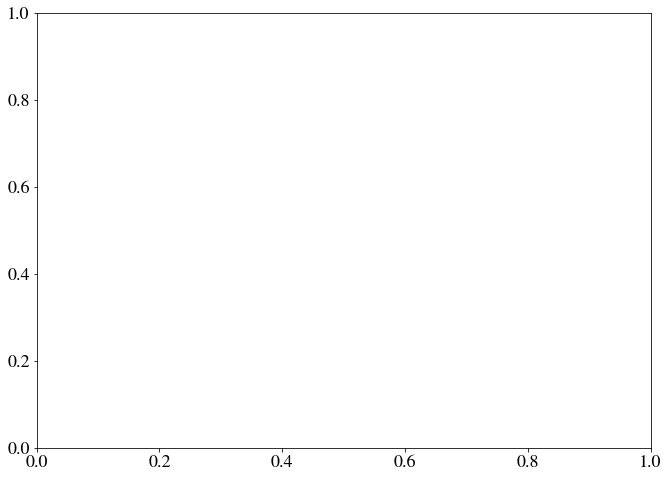

In [252]:

fig, ax = plt.subplots()
#ax.plot(times, result.expect[0])
#ax.plot(times, result.expect[1])
#ax.plot(times, result.expect[2])
ax.plot(times1, result.expect[3]-(result.expect[0])**2)
ax.plot(times1, result.expect[4]-(result.expect[1])**2)
ax.plot(times1, result.expect[5]-(result.expect[2])**2)



ax.set_xlabel('Time')
ax.set_ylabel('Expectation values')
ax.legend(("VarX", "VarY","VarZ",))

#plt.plot(times,(N/2)*(p0_gen(times) + np.conjugate(p0_gen(times)) ),"-.",label="Analytic")
#varX=(N/4)+(N*(N-1)/2)*( np.real(pp_gen(times1)) + np.real(pm_gen(times1)))-(N**2)*(np.real(p0_gen(times1)))**2
#varY=(N/4)+(N*(N-1)/2)*( -np.real(pp_gen(times1)) + np.real(pm_gen(times1)))-(N**2)*(np.imag(p0_gen(times1)))**2
#varZ=(N/4)*(1-(z0_gen(times1))**2)




#plt.plot(times1,varX,"--",label="$(\Delta S_x)^2$ analytic")
#plt.plot(times1,varY,"--",label="$(\Delta S_y)^2$ analytic")
#plt.plot(times1,varZ,"--",label="$(\Delta S_z)^2$ analytic")

plt.show()



In [ ]:
fig, ax = plt.subplots()

plt.plot(times,(Result_varDDTWA[0]),label="DDTWA $S_x$")
plt.plot(times,(Result_varDDTWA[1]),label="DDTWA $S_y$")
plt.plot(times,(Result_varDDTWA[2]),label="DDTWA $S_z$")

ax.plot(times, result.expect[0],label="Qutip $S_x$")
ax.plot(times, result.expect[1],label="Qutip $S_x$")
ax.plot(times, result.expect[2],label="Qutip $S_x$")
